**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to 100 so that Canvas gives the same weight to Assignments 2-6.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.



In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0


# **Assignment 4**

The goal of this assignment is to run some experiments with scikit-learn on a fairly sizeable and interesting image data set. This is the MNIST data set, which consists of tens of thousands of images, each having 28x28 pixels. By today's standards, this dataset may seem relatively tiny, but only a few years ago was quite challenging computationally, and it motivated the development of several ML algorithms and models that are now state-of-the-art  solutions for much bigger data sets.

The assignment is experimental. We will try to whether a combination of PCA and kNN can yield any good results for the MNIST data set. Let's see if it can be made to work on this data set.

Note: There are less difficult Python parts in this assignment. You can get things done by just using code snippets from the class notebooks (no attribution is needed for code from class notebooks or standard Python libraries). But your participation and interaction via Canvas is always appreciated!

**You may use ChatGPT to help with this assignment.** (Unless the question specifically requests it, the use of ChatGPT is **optional**.) However, if you do use ChatGPT to help with a particular question, you must submit a full transcript of all your interactions with ChatGPT in the form of screenshots embedded in the text cells provided. You must also do this on your own &mdash; using the results of another person's ChatGPT session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of ChatGPT's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

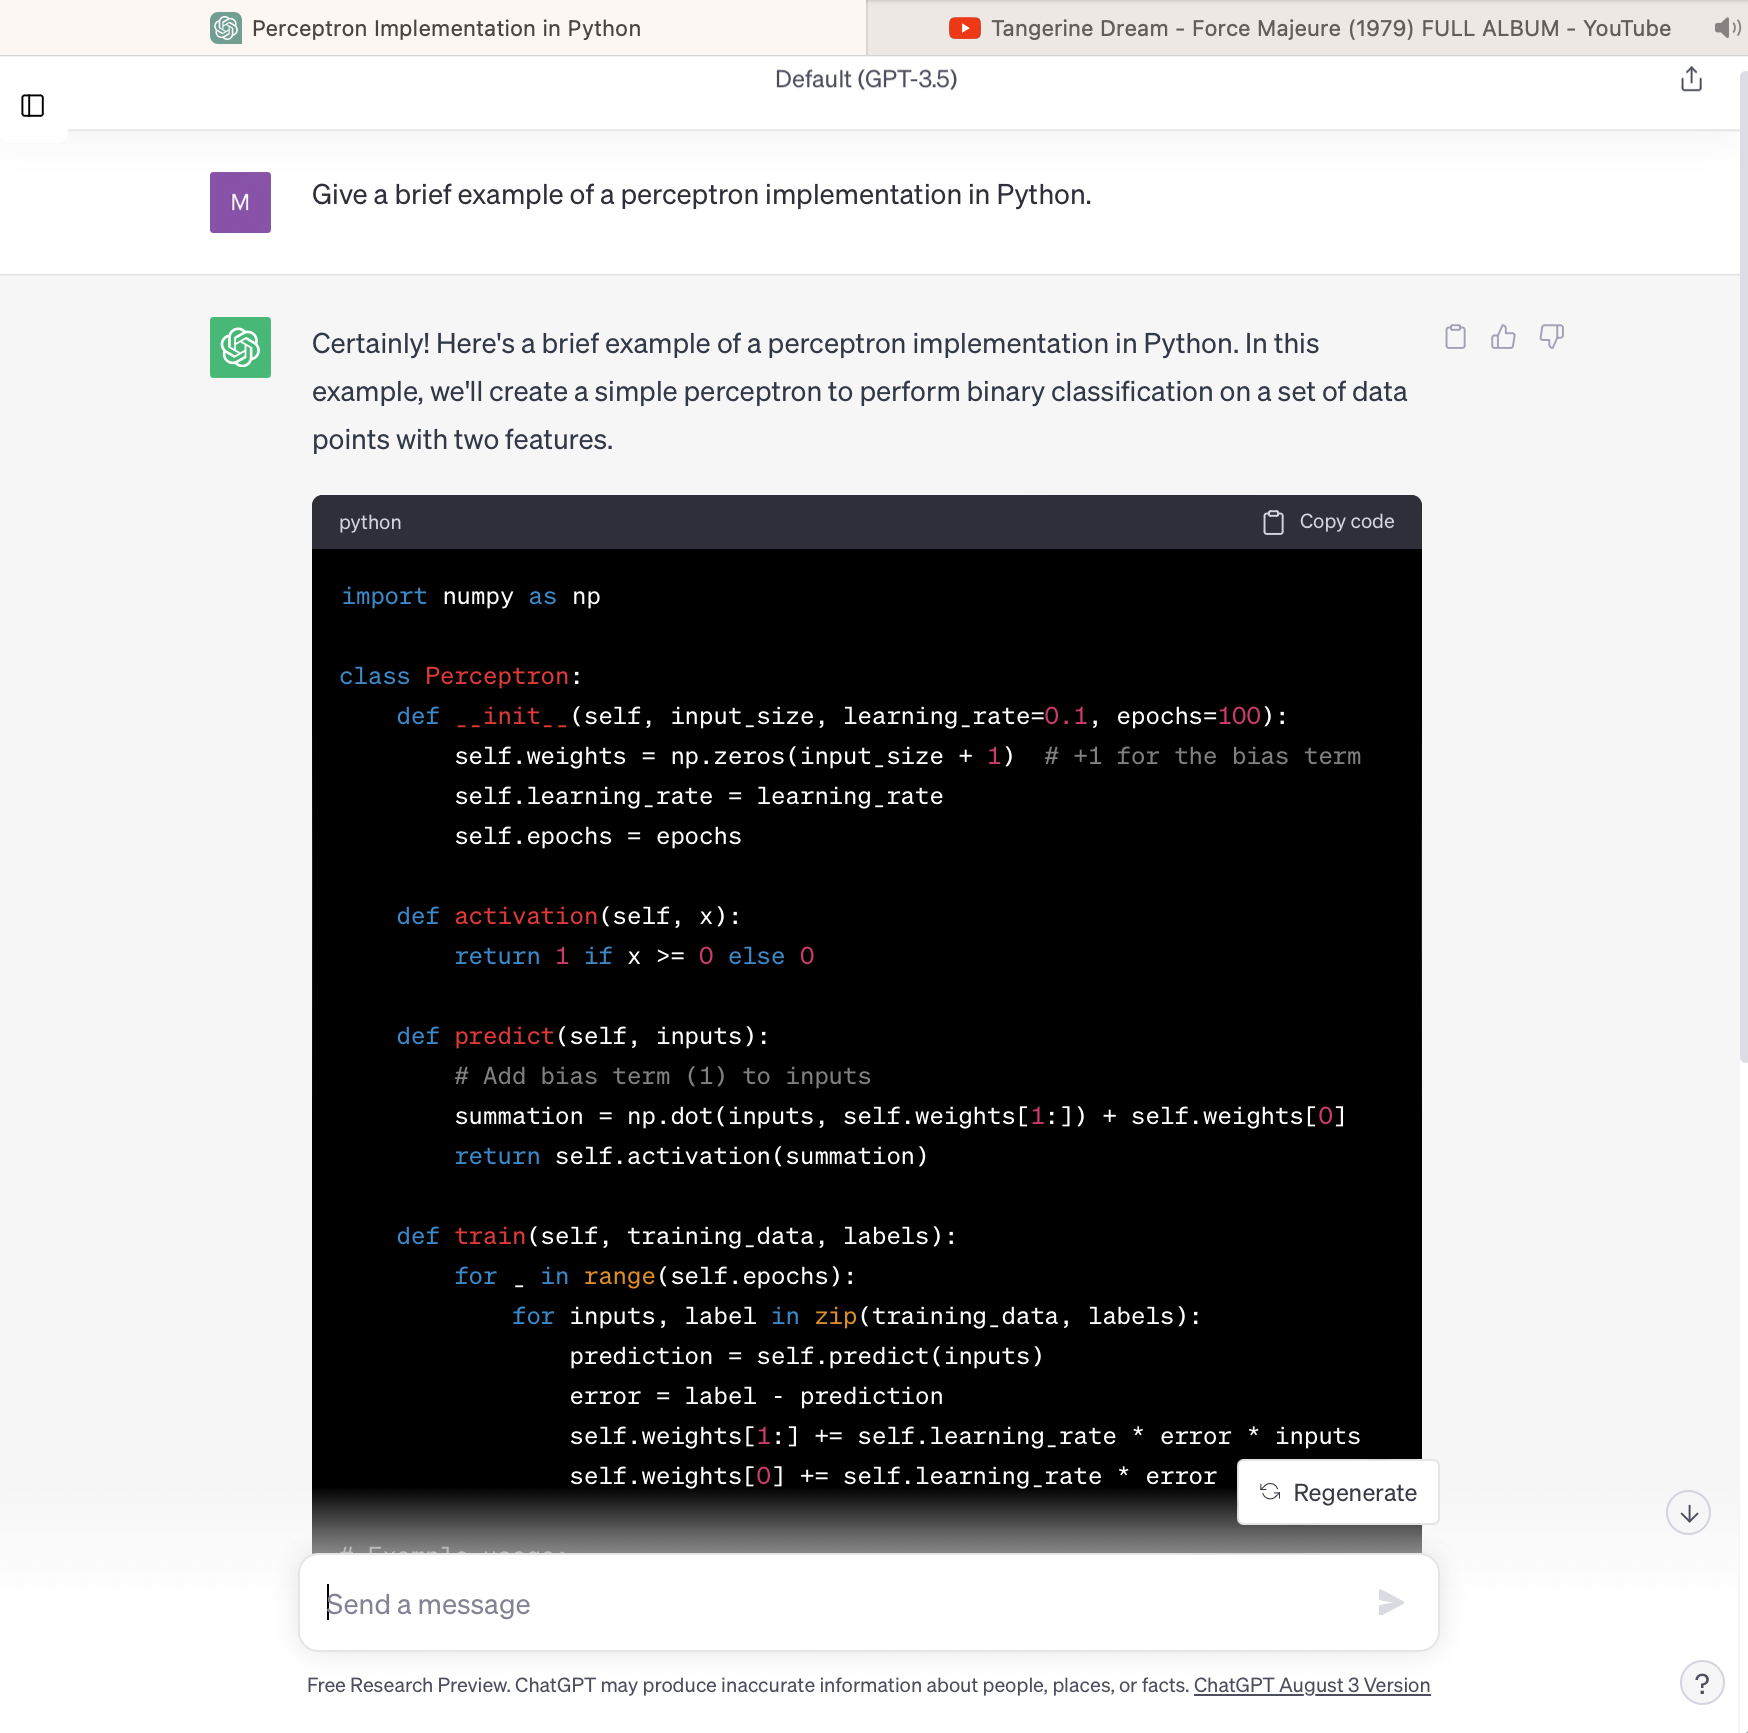

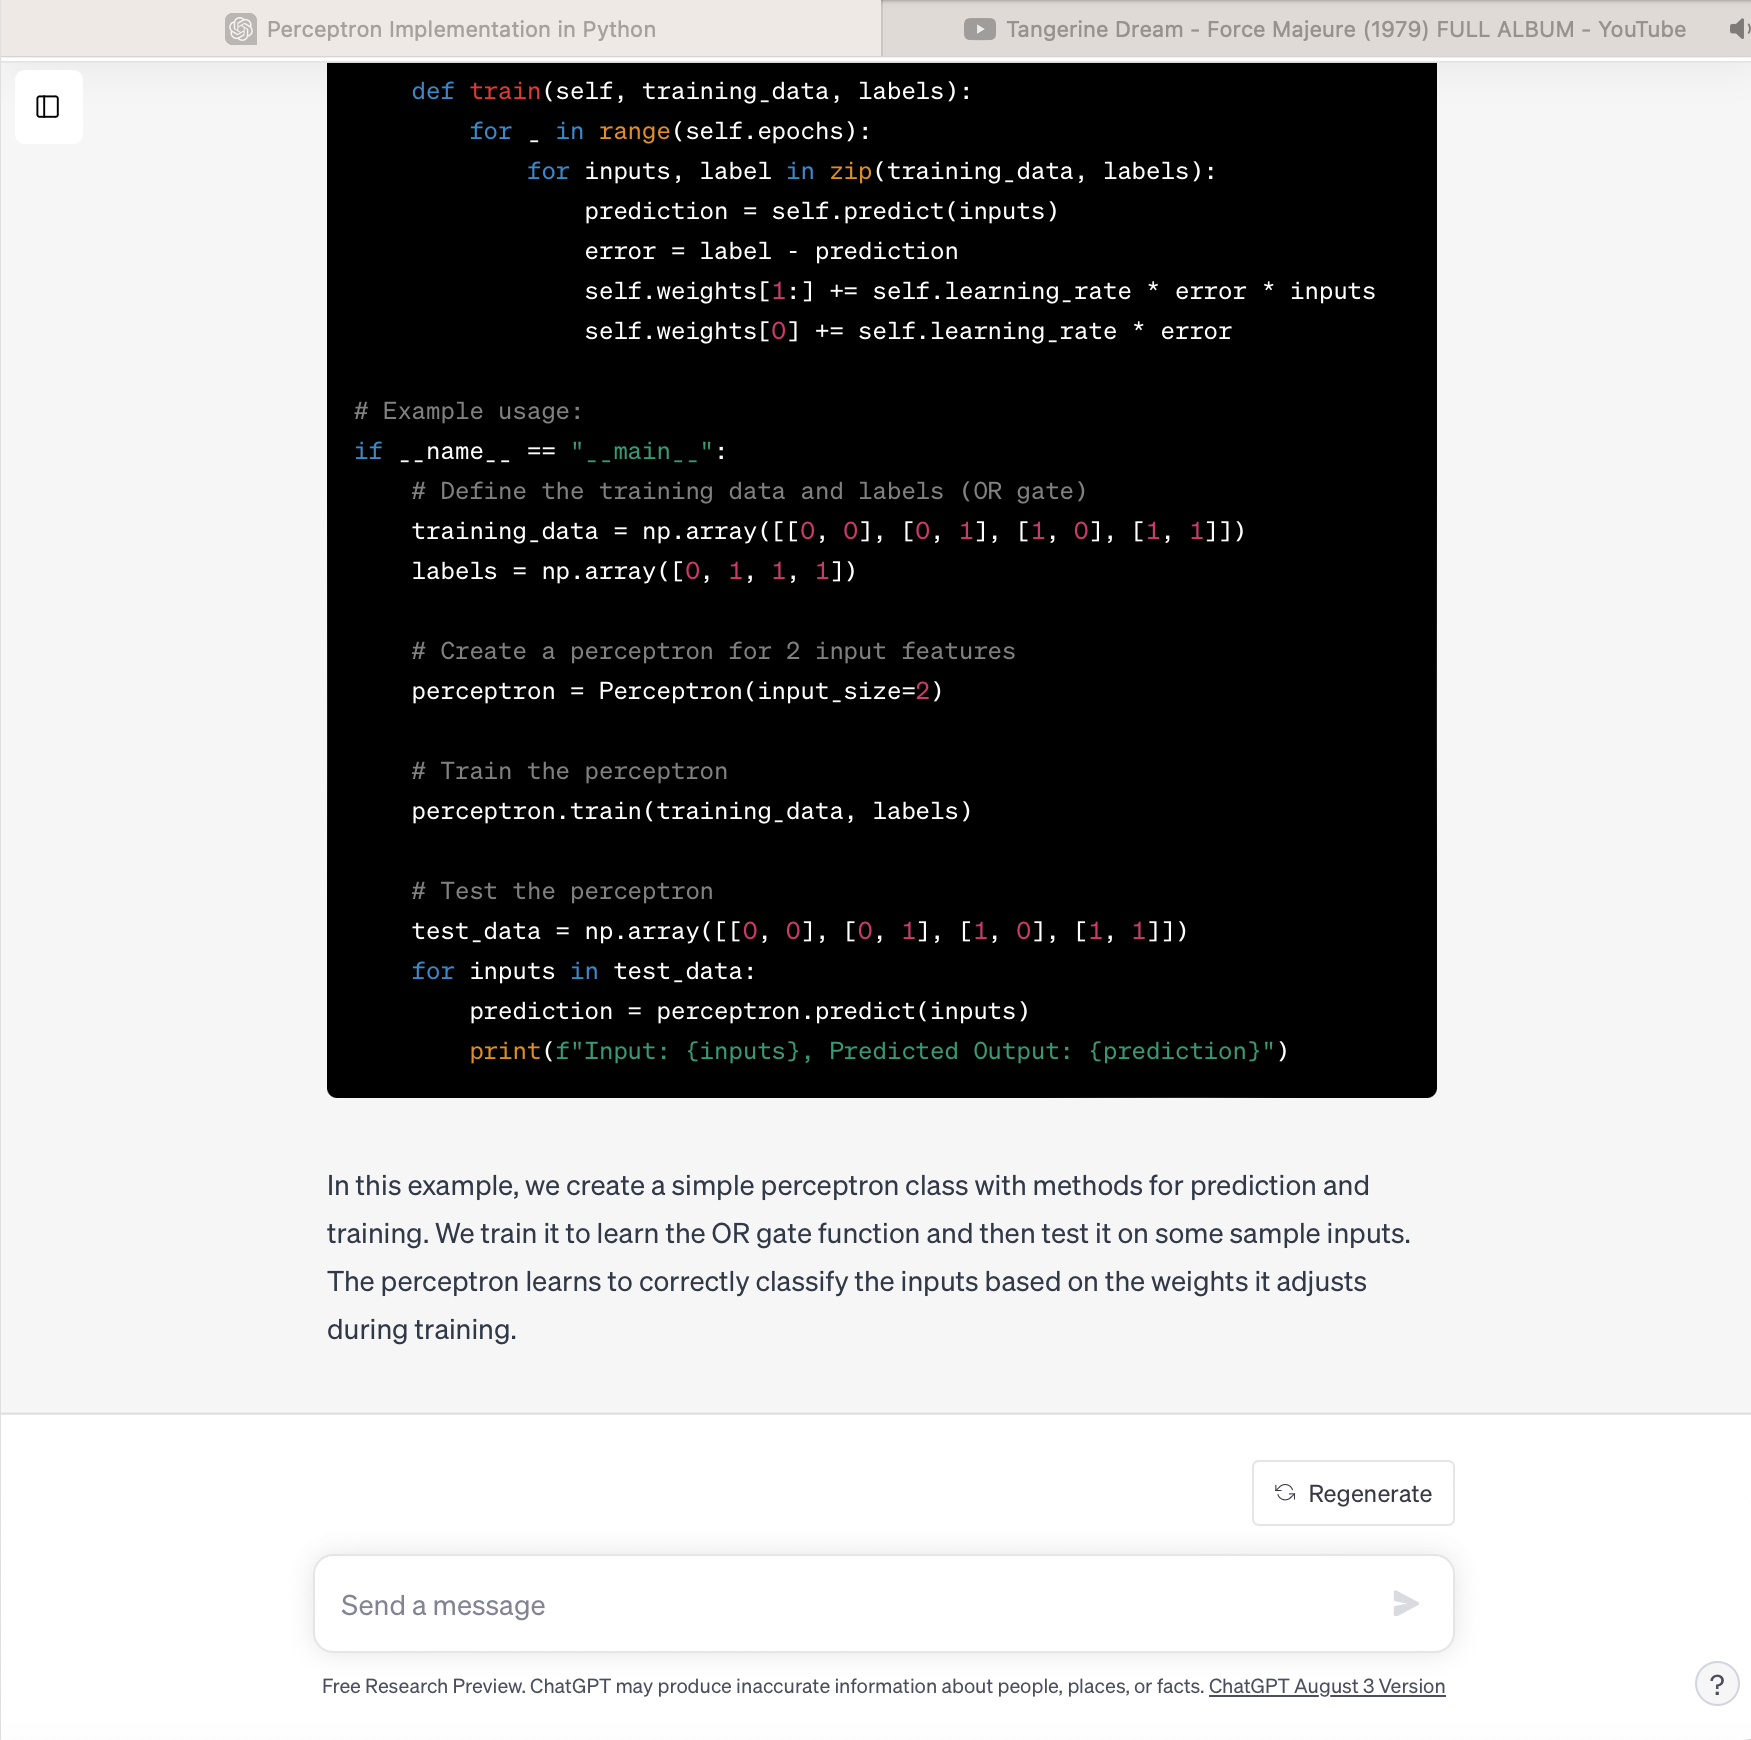

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
#import os
#import pandas as pd
#import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
#from sklearn.linear_model import LogisticRegression

In [ ]:
# we load the data set directly from scikit learn
#
# note: this operation may take a few seconds. If for any reason it fails we
# can revert back to loading from local storage.

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = ((X / 255.) - .5) * 2    # Line A for Question Q1-5
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=123, stratify=y)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## <font color = 'blue'> Question 1. Inspecting the Dataset </font>

**Q1-1** How many data points are in the training and test sets? <br>
**Q1-2** How many attributes does the data set have?

Explain how you found the answer to the first two questions.

[**Hint**: Use the 'shape' method associated with numpy arrays.]

**Q1-3** How many different labels does this data set have? Can you demonstrate how to read that number from the vector of labels *y_train*?  <br>
**Q1-4** How does the number of attributes relate to the size of the images? <br>
**Q1-5** What is the role of Line A in the above code?





*(Please insert cells below for your answers. Clearly identify the part of the question you are answering)*

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [ ]:

print("1-2")
print(f"Shapes - X train: {X_train.shape}, y train: {y_train.shape}, X test: {X_test.shape}, y test: {y_test.shape}")


print("\n1-3")
unique_labels = y.unique()
print(f"Labels: {unique_labels}, Number of labels: {len(unique_labels)}")


print("\n1-4")
num_pixels = 28 * 28
print(f"Number of pixels (28x28): {num_pixels}")


print("\n1-5")
print(f"X min: {X.min().values.min()}, X max: {X.max().values.max()}")


1-2
Shapes - X train: (60000, 784), y train: (60000,), X test: (10000, 784), y test: (10000,)

1-3
Labels: [5 0 4 1 9 2 3 6 7 8], Number of labels: 10

1-4
Number of pixels (28x28): 784

1-5
X min: -1.0, X max: 1.0


1-1

The training set comprises 60,000 samples, while the testing set contains 10,000 samples. In the context of matrices, where $X$ and $y$ represent feature matrices and label vectors, respectively, the shape attribute reveals the size of these datasets. Specifically, $n_{train} = 60,000$ indicates that the training set has 60,000 rows (or samples), and $n_{test} = 10,000$ indicates 10,000 rows (or samples) in the test set. This differentiation is crucial for machine learning, where models are trained on larger subsets and validated or tested on smaller subsets.

1-2

The dataset features 784 distinct attributes. This insight is drawn from the same principle applied in Q1-i regarding the shape of matrices. Here, $d = 784$ implies that each sample in the dataset is described by 784 different features. This high dimensionality is typical in datasets like image processing, where each pixel's intensity value becomes a feature.

1-3

The dataset is labeled with 10 unique categories, specifically the digits from 0 to 9. This is inferred from the distinct values present in $y_{\mathit{train}}$, the training label set. In classification tasks, especially in digit recognition, each label corresponds to a class the model needs to predict, in this case, the digits 0 through 9.

1-4

The attribute count mirrors the pixel count in each image, which is 784. This corresponds to images that are 28 pixels wide and 28 pixels tall, as $28^2$ equals 784. In image-based datasets, each pixel's intensity is often used as a feature, leading to a direct correlation between the number of pixels and the number of attributes.

1-5

Line A standardizes the dataset values to a range between -1 and 1. This standardization is a two-step process. First, dividing by 255 normalizes the values (originally ranging from 0 to 255, typical in grayscale images) to a 0-1 range. The second step, subtracting 0.5 and then multiplying by 2, shifts this range to -1 to 1. This normalization is a common preprocessing step in machine learning to ensure consistent scaling across different features, especially important when dealing with neural networks or algorithms sensitive to feature scaling.








In [ ]:
# For grader use only

# For Questions Q1-1 to Q1-4, assign 0-2 points for each subquestion
# For Question Q1-5, assign 0-4 points

# insert grade here

# maxScore = maxScore + 2
# G[1,1] =

# maxScore = maxScore + 2
# G[1,2] =

# maxScore = maxScore + 2
# G[1,3] =

# maxScore = maxScore + 2
# G[1,4] =

# maxScore = maxScore + 4
# G[1,5] =


##  <font color = 'blue'> Question 2. PCA on MNIST </font>

Because the number of attributes of the MNIST data set may be too big to apply kNN on it (due to the 'curse of dimensionality'), we would like to compress the images down to a smaller number of transformed attributes.

Use scikit-learn to output a data set *X_train_transformed* and *X_test_transformed*, with $l$ attributes. Here a reasonable choice of $l$ is 10, equal to the number of labels. But you can try slightly smaller or larger values as well.


**Hint**: Take a look at [this notebook](https://colab.research.google.com/drive/1DG5PjWejo8F7AhozHxj8329SuMtXZ874?usp=drive_fs) we used in the lecture, and imitate what we did there. Be sure to use only the scikit-learn demonstration, not the exhaustive PCA steps we did before it.

**Note**: This computation can take a while! If problems are encountered, we can try the same experiment on a downsized data set.

In [ ]:
from sklearn.decomposition import PCA

l=10
pca = PCA(l)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)
print("Q2")
print("X train transformed shape: {}".format(X_train_transformed.shape))
print("X test transformed shape: {}".format(X_test_transformed.shape))

Q2
X train transformed shape: (60000, 10)
X test transformed shape: (10000, 10)


(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [ ]:
# for grader use

# insert grade here (out of 4)

# maxScore = maxScore +4
# G[2,1] =



## <font color = 'blue'> Question 3. kNN on MNIST attributes from PCA </font>


Having created a *transformed* MNIST data set, we can now apply a kNN approach. Here are the steps:

Q3-1: Fit a $k$-NN classifier on the transformed data set. Here $k$ is a hyperparameter, and you can experiment with it. Be aware though, that larger values of $k$ can take more time to fit.

Q3-2: Apply the classifier on the transformed test set. What is the classification accuracy?

Q3-3: A theoretical question: if we skipped all the above steps and we just assigned a **random** label to each test point, what would the classification accuracy be on average?  Is your result from Q3-2 better than the random expectation?

Q3-4 Experiment with different settings of $k$, and other hyperparameters that are described in the scikit-learn manual of the kNN classifier. Report your findings in a separate cell. Also for **participation points**: report your best result in the Weekly Discussion Forum!

[**Hint**: Imitate the steps from the classroom notebook.]


(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

3-1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [ ]:
#3-2
print("3-2")
N = len(y_test)
y_pred = knn.predict(X_test_transformed)
print("Accuracy: {}".format(sum(y_pred == y_test)/N))

3-2
Accuracy: 0.9345


In [ ]:
#3-3
print("3-3")
trials = 1000
accs = []
for i in range(trials):
  y_rand = np.random.randint(0,9,N)
  accs.append(sum(y_rand == y_test)/N)
print("Mean Accuracy: {}".format(round(np.array(accs).mean(),5)))

3-3
Mean Accuracy: 0.10007


In [ ]:
# 3-4

# Evaluating accuracy for increasing k values and stopping when
# accuracy does not increase in 5 consecutive trials.

print("3-4")
total_test_samples = len(y_test)
accuracy_scores = [0] * 100
decreasing_count = 0
max_decreases = 5
for k_value in range(1, 100):
    if k_value % 5 == 0:
        print(f"k={k_value}")
    knn_classifier = KNeighborsClassifier(n_neighbors=k_value, weights='distance')
    knn_classifier.fit(X_train_transformed, y_train)
    predictions = knn_classifier.predict(X_test_transformed)
    accuracy_scores[k_value] = np.mean(predictions == y_test)
    if accuracy_scores[k_value] <= accuracy_scores[k_value - 1]:
        decreasing_count += 1
    else:
        decreasing_count = 0
    if decreasing_count == max_decreases:
        break

optimal_k = np.argmax(accuracy_scores)
optimal_accuracy = accuracy_scores[optimal_k]
print(accuracy_scores[1:k_value])
optimal_k, optimal_accuracy


3-4
k=5
k=10
k=15
k=20
k=25
[0.9185, 0.9185, 0.9314, 0.9343, 0.9352, 0.9352, 0.9351, 0.9352, 0.935, 0.9346, 0.9349, 0.9342, 0.9332, 0.9339, 0.9324, 0.9337, 0.9325, 0.9323, 0.931, 0.9314, 0.9309, 0.931, 0.9299, 0.9296, 0.9293, 0.9288]


(5, 0.9352)

###3-3
Understanding the Expected Classification Accuracy in a Given Set
In a given dataset, each element, denoted as X_i, represents the accuracy of classifying an individual data point. If X_i equals 1, it means the classification was correct, and if it's 0, the classification was incorrect.

To calculate the overall accuracy for this dataset, we use the formula:


Overall Accuracy = (1/N) * sum of X_i from i=1 to N


Here, N is the total number of data points, and we're adding up all the correct classifications (the 1s).

To determine what accuracy we might expect on average, we look at the expected value of this accuracy formula. The expected value gives us an idea of the average outcome if we were to repeat this process many times. For our accuracy formula, the expected value is calculated as:


Expected Value of Overall Accuracy = (1/N) * sum of E[X_i] from i=1 to N

In this formula, E[X_i] is the expected value of each individual classification accuracy, X_i.

Since X_i is a Bernoulli random variable (it can only be 0 or 1), its expected value, E[X_i], is the probability of it being 1, which is the same as the probability of a correct classification for each data point.

Given that X_i is randomly assigned, the probability of a correct classification (P(X_i = 1)) is 0.1.

Therefore, the expected value of the overall accuracy is:

(1/N) * sum of 0.1 from i=1 to N = 0.1

This expected accuracy (10%) is lower than what we would achieve using methods like PCA (Principal Component Analysis) and kNN (k-Nearest Neighbors) as discussed in earlier parts.







##3-4

The accuracy of the model improves as the value of $k$ increases, peaking at $k=6$. Beyond this point, the accuracy begins to decline.

The optimal accuracy achieved was $93.54%$. This was obtained with the following hyperparameters: $l=10$ (noting that a greater number of components might yield even better accuracy), $k=6$, and the setting of weights to "distance".

In [ ]:
# for grader use

# insert grade here (each item out of 4)

# maxScore = maxScore +16
# G[3,1] =
# G[3,2] =
# G[3,3] =
# G[3,4] =

In [ ]:
# for grader use

# Total Grade Calculation
rawScore = np.sum(G)
score = rawScore*100/maxScore

NameError: ignored